In [146]:
import os
import scipy
import pandas as pd
pd.options.display.max_rows = 10
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
plt.style.use('seaborn')
%matplotlib inline

In [147]:
url = 'https://www.wholesalesolar.com/list-grid-tie-packages'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "html5lib")

In [148]:
soup.find_all('td')

[<td><a class="single-product-link" data-product_id="31019" href="https://www.wholesalesolar.com/1895201/wholesale-solar/complete-systems/1.8-kw-grid-tied-solar-system-with-enphase-iq7-microinverters-and-6x-heliene-300w-panels">1.8 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Heliene 300w Panels</a></td>,
 <td>1895201</td>,
 <td><span data-slug="1-8">1.8</span> kW</td>,
 <td><span data-slug="270-0">270.0</span> kWh</td>,
 <td>6 Heliene 300 Black Mono Panels</td>,
 <td>6 Enphase IQ7+ Micro Inverters</td>,
 <td data-sort="3645.95"><span class="woocommerce-Price-amount amount"><span class="woocommerce-Price-currencySymbol">$</span>3,645.95</span></td>,
 <td>heliene</td>,
 <td>enphase</td>,
 <td><a class="single-product-link" data-product_id="31023" href="https://www.wholesalesolar.com/1895203/wholesale-solar/complete-systems/2.07-kw-grid-tied-solar-system-with-enphase-iq7-microinverters-and-6x-astronergy-solar-345w-panels">2.07 kW Grid Tied Solar System with Enphase I

In [149]:
components = [element.text for element in soup.find_all('td')]

In [150]:
components

['1.8 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Heliene 300w Panels',
 '1895201',
 '1.8 kW',
 '270.0 kWh',
 '6 Heliene 300 Black Mono Panels',
 '6 Enphase IQ7+ Micro Inverters',
 '$3,645.95',
 'heliene',
 'enphase',
 '2.07 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Astronergy Solar 345w Panels',
 '1895203',
 '2.1 kW',
 '310.5 kWh',
 '6 Astronergy Solar CHSM6612P/HV-345 Silver Poly Panels',
 '6 Enphase IQ7+ Micro Inverters',
 '$3,664.00',
 'astronergy-solar',
 'enphase',
 'Solar Sky 2.07 kW Grid Tied Solar System with SMA and 6x Astronergy Solar 345 Panels',
 '1892025',
 '2.1 kW',
 '310.5 kWh',
 '6 Astronergy Solar CHSM6612P/HV-345 Silver Poly Panels',
 '1 SMA Sunny Boy 3.8-US Inverter',
 '$3,807.00',
 'astronergy-solar',
 'sma',
 'SMA 2.4 kW Grid Tied Solar System with SMA Inverter and 8x Heliene 300w Panels',
 '1892399',
 '2.4 kW',
 '360.0 kWh',
 '8 Heliene 300 Black Mono Panels',
 '1 SMA Sunny Boy 3.8-US Inverter',
 '$4,273.00',
 'helien

In [151]:
n = 9
packages = [components[i * n:(i + 1) * n] for i in range((len(components) + n - 1) // n )]
packages

[['1.8 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Heliene 300w Panels',
  '1895201',
  '1.8 kW',
  '270.0 kWh',
  '6 Heliene 300 Black Mono Panels',
  '6 Enphase IQ7+ Micro Inverters',
  '$3,645.95',
  'heliene',
  'enphase'],
 ['2.07 kW Grid Tied Solar System with Enphase IQ7+ Microinverters and 6x Astronergy Solar 345w Panels',
  '1895203',
  '2.1 kW',
  '310.5 kWh',
  '6 Astronergy Solar CHSM6612P/HV-345 Silver Poly Panels',
  '6 Enphase IQ7+ Micro Inverters',
  '$3,664.00',
  'astronergy-solar',
  'enphase'],
 ['Solar Sky 2.07 kW Grid Tied Solar System with SMA and 6x Astronergy Solar 345 Panels',
  '1892025',
  '2.1 kW',
  '310.5 kWh',
  '6 Astronergy Solar CHSM6612P/HV-345 Silver Poly Panels',
  '1 SMA Sunny Boy 3.8-US Inverter',
  '$3,807.00',
  'astronergy-solar',
  'sma'],
 ['SMA 2.4 kW Grid Tied Solar System with SMA Inverter and 8x Heliene 300w Panels',
  '1892399',
  '2.4 kW',
  '360.0 kWh',
  '8 Heliene 300 Black Mono Panels',
  '1 SMA Sunny Boy 3.8-

In [152]:
columns = ['System','SKU','Array Size','Monthly Output','Modules','Inverter','Price','OEM',' INV OEM']
df = pd.DataFrame(packages,columns=columns)

In [153]:
df.head()

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,OEM,INV OEM
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1.8 kW,270.0 kWh,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,"$3,645.95",heliene,enphase
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2.1 kW,310.5 kWh,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,"$3,664.00",astronergy-solar,enphase
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2.1 kW,310.5 kWh,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,"$3,807.00",astronergy-solar,sma
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2.4 kW,360.0 kWh,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,"$4,273.00",heliene,sma
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2.1 kW,319.5 kWh,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,"$4,449.00",rec,sma


In [154]:
df.describe()

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,OEM,INV OEM
count,120,120,120,120,120,120,120,120,120
unique,120,120,47,50,50,50,120,3,5
top,11.04 kW Grid Tied Solar System with SolarEdge...,1895333,3.6 kW,720.0 kWh,16 Heliene 300 Black Mono Panels,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,"$19,190.00",heliene,solaredge
freq,1,1,5,5,5,8,1,52,43


In [162]:
df['Price'] = df['Price'].str.replace('$','').str.split().apply(lambda x: float(x[0].replace(',', '')))

In [165]:
df['Monthly Output'] = df['Monthly Output'].astype('str').str.replace('kWh','')

In [166]:
df['Monthly Output'] = pd.to_numeric(df['Monthly Output'], errors='ignore')

In [167]:
df['Monthly Output']

0       270.0
1       310.5
2       310.5
3       360.0
4       319.5
        ...  
115    4140.0
116    4140.0
117    4260.0
118    4260.0
119    2025.0
Name: Monthly Output, Length: 120, dtype: float64

Text(0, 0.5, 'Price')

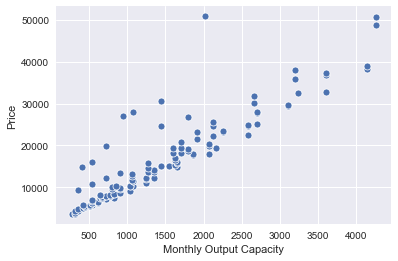

In [168]:
x = df['Monthly Output']
y = df['Price']
sns.scatterplot(x,y)
plt.xlabel("Monthly Output Capacity")
plt.ylabel("Price")

In [160]:
plt.savefig('hardwarecosts.png')

<Figure size 432x288 with 0 Axes>

In [169]:
df['Price'].dtype

dtype('float64')

In [171]:
df['OEM'].astype('category')

0               heliene
1      astronergy-solar
2      astronergy-solar
3               heliene
4                   rec
             ...       
115    astronergy-solar
116    astronergy-solar
117                 rec
118                 rec
119             heliene
Name: OEM, Length: 120, dtype: category
Categories (3, object): [astronergy-solar, heliene, rec]

In [174]:
df.corr(method='pearson')

,Monthly Output,Price
Monthly Output,1.00000,0.90155
Price,0.90155,1.00000


In [176]:
def get_module_quantity(modules):
    modules.split()
    value = modules[0]
    df['Module Quantity'] = int(value)

<class 'str'>
